# West Nile Virus Prediction

West Nile virus is spread to humans from infected mosquito bites. West Nile virus is present throughout the world, from Africa and Europe, to North and South America. While most cases of the virus do not show symptoms those that do have very severe fever, headaches, nausea and vomiting, often requiring them to miss days of work. In about 10% of cases, that show symptoms, patients will die, in 2012 the United States had one its worst outbreaks leading to over 250 deaths. To prevent these cases countries have developed many control strategies, including spraying insecticides.

Spraying insecticides kills the adult mosquitoes, our primary concern is the adult female mosquito, who bites humans for blood. There are periods where there will be very few adult mosquitoes present, but the juvenile stages, often in water, will present and unreachable by spraying. Due to this fact we can hope to optimize our spraying by using years of trap collection data, along with locations and weather data, to find the best time for spraying to occur.

The dataset I have chosen in found on Kaggle, called West Nile Virus Prediction. It has a dataset containing <100,000 mosquito samples, and their status of virus present. Then a data set with weather conditions, temperature, sun, rain, sunset time, sunrise, and so on. I hope to use this data set to be able to predict the next outbreak of West Nile

The data has already been split into a test and training set. In the training set mosquitoes have been trapped at trap site across chicago, with longitude and latitude points. Then the mosquito traps were emptied and tested for the presence of west nile virus, the mosquitoes are identified down to the species level. The test sets include the years 2007, 2009, 2011, and 2013. While the test set does not include the presence of west nile virus in the mosquiotes collected for the years 2008, 2010, 2012, and 2014. The point of the data is predict the number of cases in these years in the test set, based off the data in the training set. 

First, I would like to do some EDA, by creating a map of the number of mosquitoes collected from traps across the city by different years. 

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as pl
#%matplotlib inline

from sklearn.neighbors import KernelDensity
from __future__ import print_function
import datetime
from sklearn.cross_validation import train_test_split
import csv
from sklearn import metrics
from sklearn.utils import shuffle

C:\Users\deanm\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## EDA

In [8]:
mapdata = np.loadtxt("C:\Users\deanm\OneDrive\Documents\University of Idaho\Classes\Fall 2018\STAT 517\west_nile\input\mapdata_copyright_openstreetmap_contributors.txt")
traps = pd.read_csv('C:/Users/deanm/Documents/University of Idaho/Classe/Fall 2018/STAT 517/west_nile/input/train.csv', parse_dates=['Date'])[['Date', 'Trap','Longitude', 'Latitude', 'WnvPresent', 'Species']]
species = pd.np.unique(traps['Species'])

IOError: File C:/Users/deanm/Documents/University of Idaho/Classe/Fall 2018/STAT 517/west_nile/input/train.csv does not exist

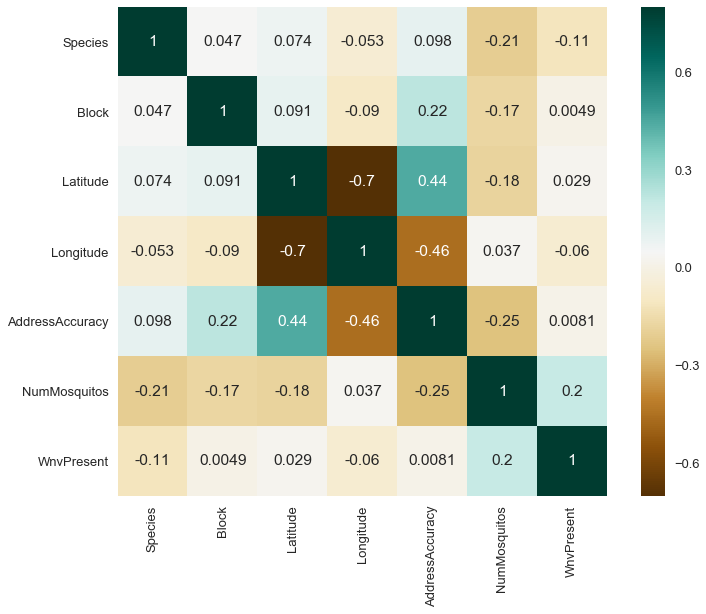

In [216]:
hmap = train.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

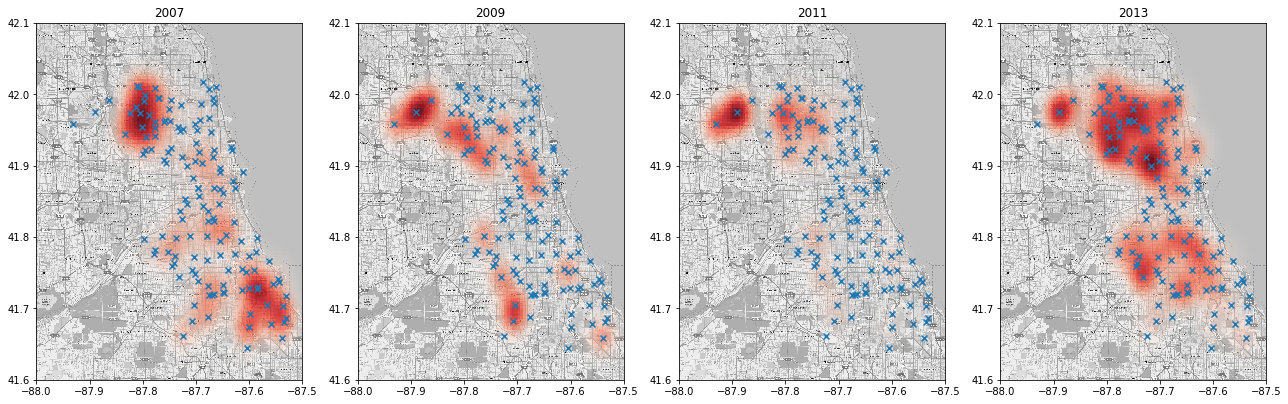

In [4]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

pl.figure(figsize=(18,6))
for year, subplot in zip([2007, 2009, 2011, 2013], [141, 142, 143, 144]):
    sightings = traps[(traps['WnvPresent'] > 0) & (traps['Date'].apply(lambda x: x.year) == year)]
    sightings = sightings.groupby(['Date', 'Trap','Longitude', 'Latitude']).max()['WnvPresent'].reset_index()
    X = sightings[['Longitude', 'Latitude']].values
    kd = KernelDensity(bandwidth=0.02)
    kd.fit(X)

    xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
    gridpoints = np.array([xv.ravel(),yv.ravel()]).T
    zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
    pl.subplot(subplot)
    pl.gca().set_title(year)
    pl.imshow(mapdata, 
               cmap=pl.get_cmap('gray'), 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.imshow(zv, 
               origin='lower', 
               cmap=alpha_cm, 
               extent=lon_lat_box, 
               aspect=aspect)
    pl.tight_layout()
    locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
    pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmap.png')

From these maps is would appear that 2011 did not have a lot of WNV, while there was more in 2007 and 2009. Based on these maps 2013 seems to be an outbreak year, meaning this year may prove to be useful in models we build. 

SKIPPING [1]:2007 (CULEX ERRATICUS)		No sightings
SKIPPING [2]:2009 (CULEX ERRATICUS)		No sightings
SKIPPING [3]:2011 (CULEX ERRATICUS)		No sightings
         [4]:2013 (CULEX ERRATICUS)
         [5]:2007 (CULEX PIPIENS)
         [6]:2009 (CULEX PIPIENS)
         [7]:2011 (CULEX PIPIENS)
         [8]:2013 (CULEX PIPIENS)
         [9]:2007 (CULEX PIPIENS/RESTUANS)
         [10]:2009 (CULEX PIPIENS/RESTUANS)
         [11]:2011 (CULEX PIPIENS/RESTUANS)
         [12]:2013 (CULEX PIPIENS/RESTUANS)
         [13]:2007 (CULEX RESTUANS)
         [14]:2009 (CULEX RESTUANS)
         [15]:2011 (CULEX RESTUANS)
         [16]:2013 (CULEX RESTUANS)
         [17]:2007 (CULEX SALINARIUS)
         [18]:2009 (CULEX SALINARIUS)
         [19]:2011 (CULEX SALINARIUS)
         [20]:2013 (CULEX SALINARIUS)
SKIPPING [21]:2007 (CULEX TARSALIS)		No sightings
         [22]:2009 (CULEX TARSALIS)
         [23]:2011 (CULEX TARSALIS)
SKIPPING [24]:2013 (CULEX TARSALIS)		No sightings
         [25]:2007 (CULEX TERRITANS

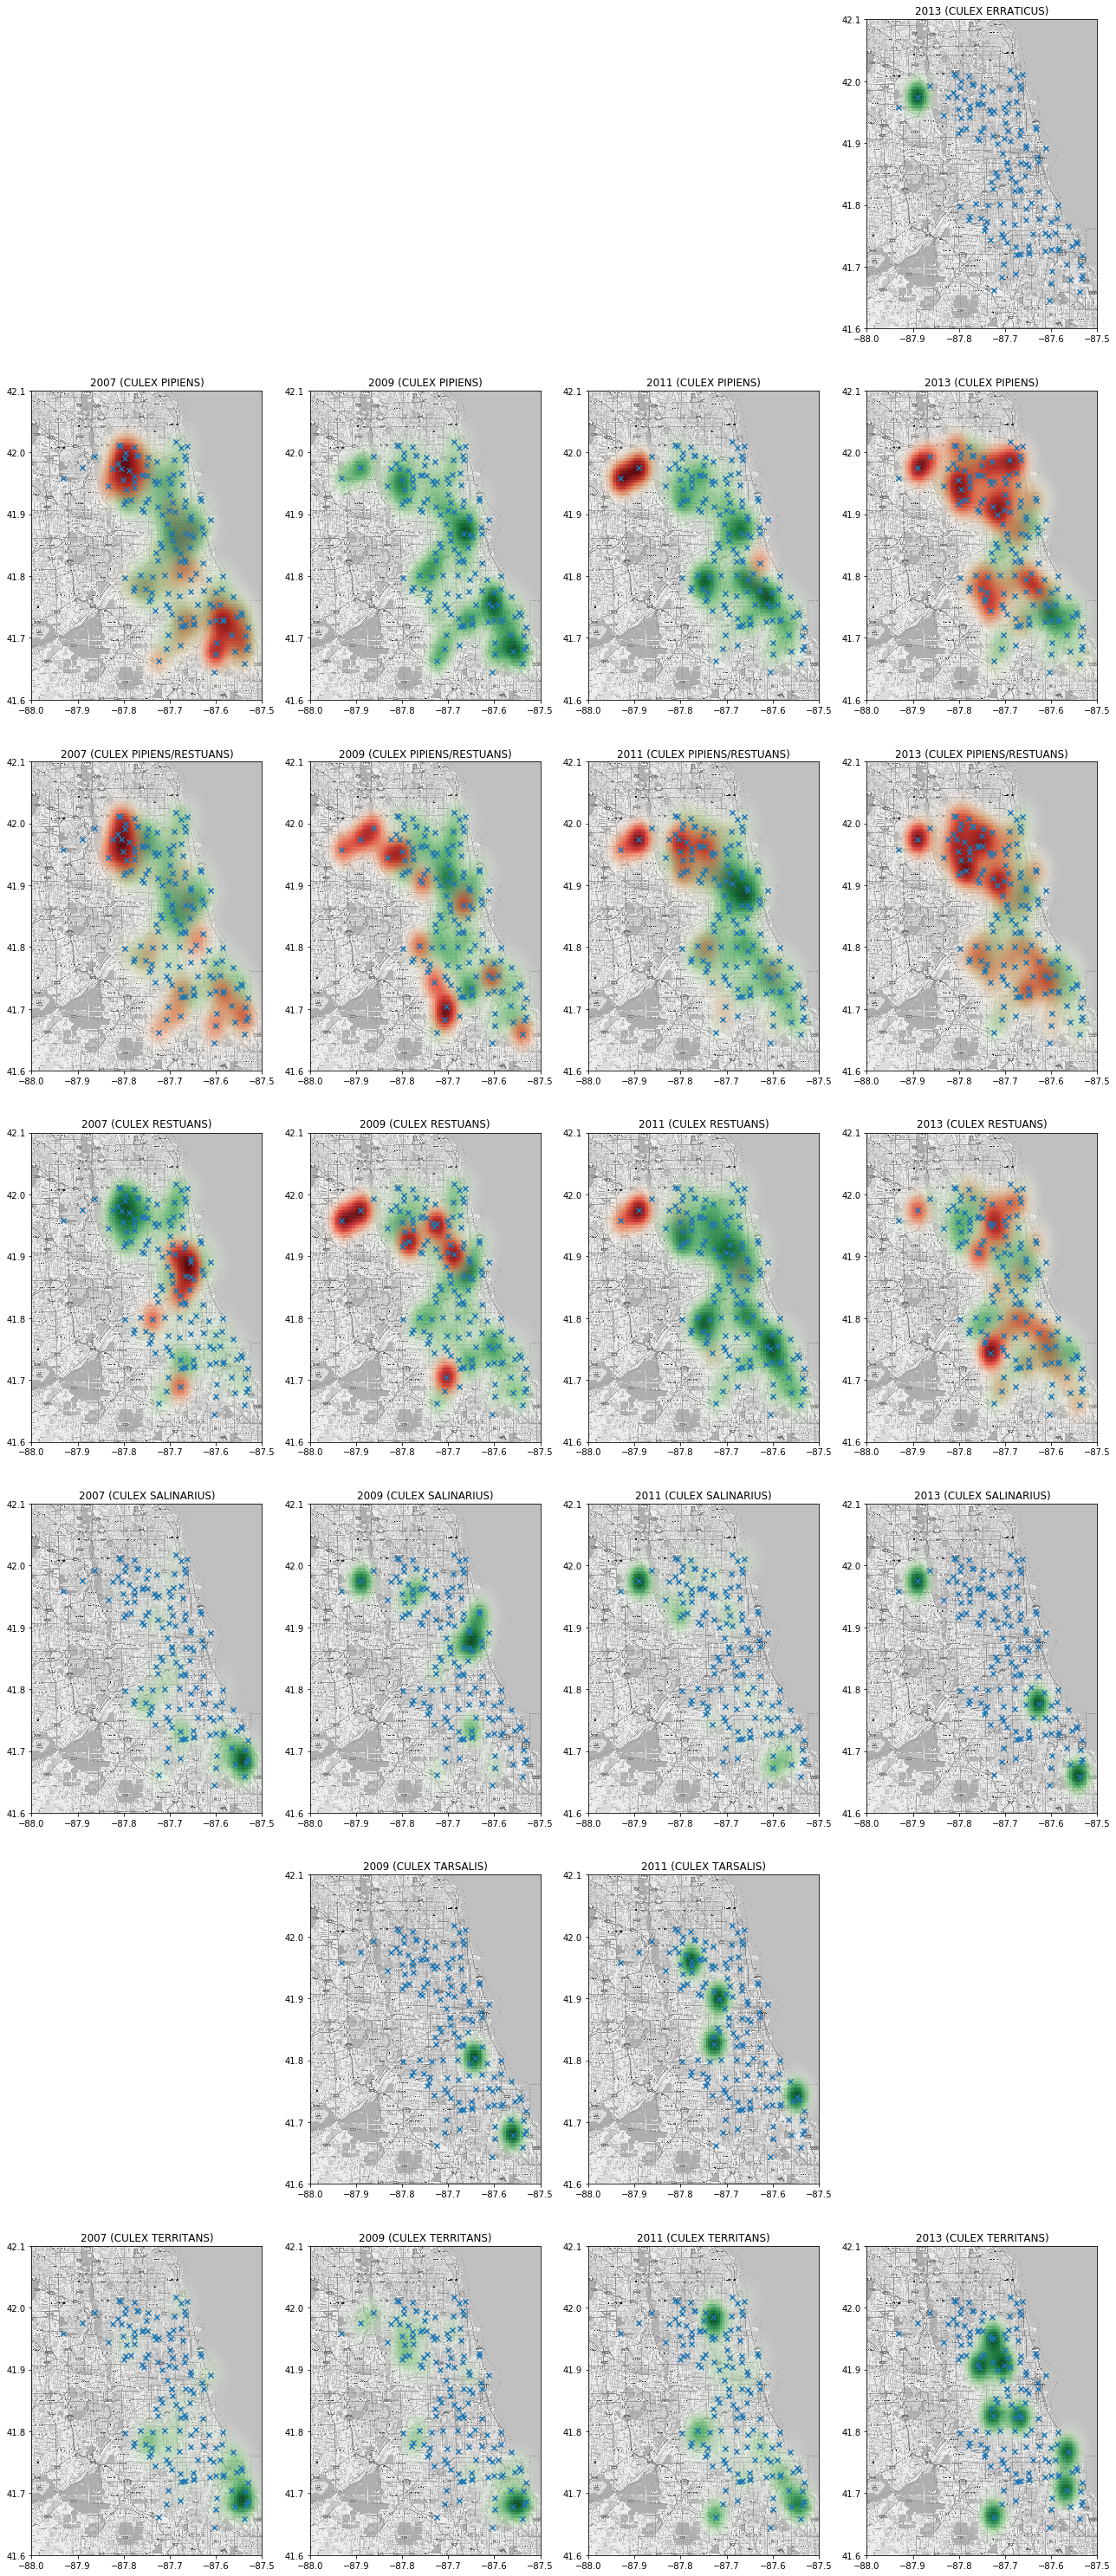

In [5]:
alpha_cm = pl.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
alpha_mcm = pl.cm.Greens
alpha_mcm._init()
alpha_mcm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

subplot = 0
numSpcs = len(species)
pl.figure(figsize=(18,6*numSpcs))
for spcsIndx in range(numSpcs):
    for year in [2007, 2009, 2011, 2013]:
        subplot += 1
        sightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['WnvPresent'] > 0)
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        sightings = sightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['WnvPresent'].reset_index()
        mSightings = traps[(traps['Species'] == species[spcsIndx])
                          & (traps['Date'].apply(lambda x: x.year) == year)]
        mSightings = mSightings.groupby(['Date', 'Trap', 'Longitude', 'Latitude', 'Species']).max()['WnvPresent'].reset_index()
        if(len(mSightings) <= 0):
            print("SKIPPING [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")\t\tNo sightings")
            continue

        mX = mSightings[['Longitude', 'Latitude']].values
        mkd = KernelDensity(bandwidth=0.02)
        mkd.fit(mX)
        mxv,myv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
        mGridpoints = np.array([mxv.ravel(),myv.ravel()]).T
        mzv = np.exp(mkd.score_samples(mGridpoints).reshape(100,100))

        pl.subplot(numSpcs, 4, subplot)
        pl.gca().set_title(str(year) + " (" + species[spcsIndx] + ")")
        pl.imshow(mapdata, 
                   cmap=pl.get_cmap('gray'), 
                   extent=lon_lat_box, 
                   aspect=aspect)
        pl.imshow(mzv, 
                   origin='lower', 
                   cmap=alpha_mcm, 
                   extent=lon_lat_box, 
                   aspect=aspect)
        if(len(sightings) > 0):
            X = sightings[['Longitude', 'Latitude']].values
            kd = KernelDensity(bandwidth=0.02)
            kd.fit(X)
            xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
            gridpoints = np.array([xv.ravel(),yv.ravel()]).T
            zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))
            pl.imshow(zv, 
                       origin='lower', 
                       cmap=alpha_cm, 
                       extent=lon_lat_box, 
                       aspect=aspect)
        print("         [" + str(subplot) + "]:" + str(year) + " (" + species[spcsIndx] + ")")
        pl.tight_layout()
        locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
        pl.scatter(locations[:,0], locations[:,1], marker='x')

pl.savefig('heatmap.png')

As we can see in the above figure different species of mosquitoes prefer different areas of the city. This to us indicates species is an important determinenistic feature for our model. Since in the WNV by year map we don't see an virus in parts of the cities that has lots of mosquitoes. So, certain mosquito species are more likely to carry the disease than other, and in fact this is a well established in vector ecology, some mosquitoes are better hosts than others. 

Since mosquito species and location seem to be a good indicator of where disease is, I plan to create a few simple models with just this data set, excluding the weather information for now. I will use models we have learned in class, neural network, decision tree, random forest, and support vector machine. 

## Basic Models

In [244]:
train = pd.read_csv('C:/Users/Dean/Desktop/University of Idaho/Classes/Fall 2018/STAT 517/west_nile/input/train.csv', parse_dates=['Date'])


features_categorical = ["Species"]
for c in features_categorical:
    train[c] = pd.Categorical(train[c]).codes

In [245]:
train =train.drop(train.columns[3:7], axis=1)

X = train.iloc[:,2:7].values
Y = train.iloc[:,7].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 100)

In [246]:
X_train=np.array(list(X_train), dtype=np.int)
y_train=np.array(list(y_train), dtype=np.int)
X_test=np.array(list(X_test), dtype=np.int)
y_test=np.array(list(y_test), dtype=np.int)

In [247]:
X_test

array([[  1,  41, -87,   9,   3],
       [  3,  41, -87,   9,   3],
       [  1,  41, -87,   5,  50],
       ...,
       [  2,  41, -87,   8,  13],
       [  1,  41, -87,   9,   2],
       [  3,  41, -87,   9,   9]])

In [248]:
y_test

array([0, 0, 0, ..., 0, 0, 0])

In [249]:
from sklearn.linear_model import LogisticRegression
clf_Log = LogisticRegression(solver='liblinear', max_iter=1000, 
                             random_state=42,verbose=2,class_weight='balanced')

clf_Log.fit(X_train, y_train)
y_pred_Log = clf_Log.predict(X_test)

[LibLinear]

In [250]:
from sklearn.svm import SVC

clf_SVM = SVC()

clf_SVM.fit(X_train, y_train)

y_pred_SVM = clf_SVM.predict(X_test)

In [251]:
from sklearn.ensemble import RandomForestClassifier
clf_RM = RandomForestClassifier(n_estimators = 1000, criterion='entropy', random_state=0)
clf_RM.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [252]:
y_train_pred = clf_RM.predict(X_train)
y_test_pred = clf_RM.predict(X_test)

In [261]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)
y_pred_Tree = clf.predict(X_test)

In [262]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
clf_NB = GaussianNB()
clf_NB.fit(X_train, y_train)
y_pred_NB = clf_NB.predict(X_test)

[0 0 0 ... 0 0 0]


In [255]:
from sklearn import neural_network

In [256]:
nns=neural_network.MLPClassifier(hidden_layer_sizes=(100, ), 
                                 activation='relu', solver='adam', alpha=0.0001, 
                                 batch_size='auto', learning_rate='constant', 
                                 learning_rate_init=0.01, power_t=0.5, max_iter=2000, 
                                 shuffle=True, random_state=None, tol=0.0001, verbose=False, 
                                 warm_start=False, momentum=0.9, nesterovs_momentum=True, 
                                 early_stopping=False, validation_fraction=0.1, beta_1=0.5,
                                 beta_2=0.999, epsilon=1e-08)

In [257]:
nns.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(nns.score(X_train.astype(int),y_train.astype(int))))
print("Accuracy on test set: {:.3f}".format(nns.score(X_test.astype(int),y_test.astype(int))))

Accuracy on training set: 0.944
Accuracy on test set: 0.951


Based on this NN we have a test accuracy of 95.7%, while this may seem great at first, it may actually be misleading since 100,00K total mosquitoes have been collected, but there are only a few hundred cases of the virus each year. So, a ROC and AUC will be more informations for this type of data. 

NN                     95.11%
Support Vector Machine  95.11%
Logestic Regression     71.67%
Desicion Tree           94.25%
Random forest           94.35%
Naive-Baye              95.11%


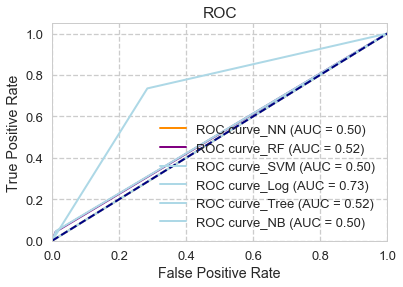

In [263]:
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score

y_pred_NN = nns.predict(X_test)

print('NN                     '+"{:.2f}".format(accuracy_score(y_test, y_pred_NN)*100)+'%')
print('Support Vector Machine  '+"{:.2f}".format(accuracy_score(y_test, y_pred_SVM)*100)+'%')
print('Logestic Regression     '+"{:.2f}".format(accuracy_score(y_test, y_pred_Log)*100)+'%')
print('Desicion Tree           '+"{:.2f}".format(accuracy_score(y_test, y_pred_Tree)*100)+'%')
print("Random forest           "+"{:.2f}".format(accuracy_score(y_test, y_test_pred)*100)+'%')
print('Naive-Baye              '+"{:.2f}".format(accuracy_score(y_test, y_pred_NB)*100)+'%')

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1.0,
        rc={"lines.linewidth": 2, 'grid.linestyle': '--'})


fpr, tpr, _ = roc_curve(y_test, y_pred_NN)
roc_auc = auc(fpr, tpr)
fpr2, tpr2, _ = roc_curve(y_test, y_test_pred)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(y_test, y_pred_SVM)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, _ = roc_curve(y_test, y_pred_Log)
roc_auc4 = auc(fpr4, tpr4)
fpr5, tpr5, _ = roc_curve(y_test, y_pred_Tree)
roc_auc5 = auc(fpr5, tpr5)
fpr6, tpr6, _ = roc_curve(y_test, y_pred_NB)
roc_auc6 = auc(fpr6, tpr6)

lw = 2
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve_NN (AUC = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, color='purple',
         lw=lw, label='ROC curve_RF (AUC = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='lightblue',
         lw=lw, label='ROC curve_SVM (AUC = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='lightblue',
         lw=lw, label='ROC curve_Log (AUC = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, color='lightblue',
         lw=lw, label='ROC curve_Tree (AUC = %0.2f)' % roc_auc5)
plt.plot(fpr6, tpr6, color='lightblue',
         lw=lw, label='ROC curve_NB (AUC = %0.2f)' % roc_auc6)

plt.plot()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

According to this model, with just using the training set features and not implementing the weather data, we have an AUC of 50%. This is a decent start to the model and can certainly be imporved upon. 